<a href="https://colab.research.google.com/github/Uddeshkarle/DS_PY_Writeups_2001612/blob/main/Exp07_notebook_2001612.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.__version__

'3.7.1'

In [2]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np


dataset = pd.read_csv('/content/drive/MyDrive/Classroom/heart_failure_clinical_records_dataset.csv')
mean = np.mean(dataset)
median = np.median(dataset)
mode = dataset.mode()


rng = np.ptp(dataset)
variance = np.var(dataset)
std_dev = np.std(dataset)


skewness = dataset.skew()
kurtosis = dataset.kurtosis()

percentiles = np.percentile(dataset, [25, 50, 75])

corr_coeffs = dataset.corr()

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Range:", rng)
print("Variance:", variance)
print("Standard deviation:", std_dev)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)
print("Percentiles:", percentiles)
print("Correlation coefficients:", corr_coeffs)


Mean: age                             60.833893
anaemia                          0.431438
creatinine_phosphokinase       581.839465
diabetes                         0.418060
ejection_fraction               38.083612
high_blood_pressure              0.351171
platelets                   263358.029264
serum_creatinine                 1.393880
serum_sodium                   136.625418
sex                              0.648829
smoking                          0.321070
time                           130.260870
DEATH_EVENT                      0.321070
dtype: float64
Median: 1.1
Mode:     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  60.0      0.0                     582.0       0.0               35.0   
1   NaN      NaN                       NaN       NaN                NaN   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                  0.0  263358.03               1.0         136.0  1.0   
1                  NaN        NaN        

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:278: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  umr_maximum(a, axis, None, out, keepdims),
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:279: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  umr_minimum(a, axis, None, None, keepdims),


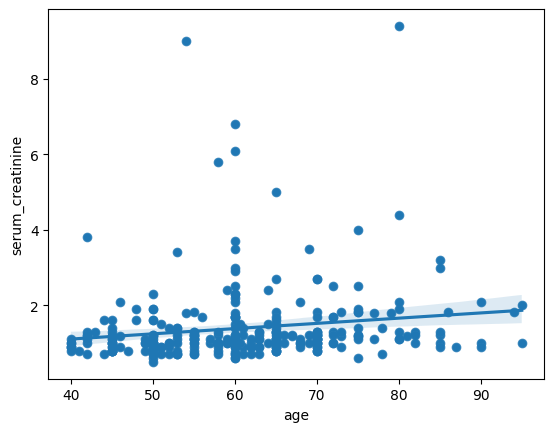

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("/content/drive/MyDrive/Classroom/heart_failure_clinical_records_dataset.csv")


sns.scatterplot(data=df, x="age", y="serum_creatinine")


sns.regplot(data=df, x="age", y="serum_creatinine")


plt.show()


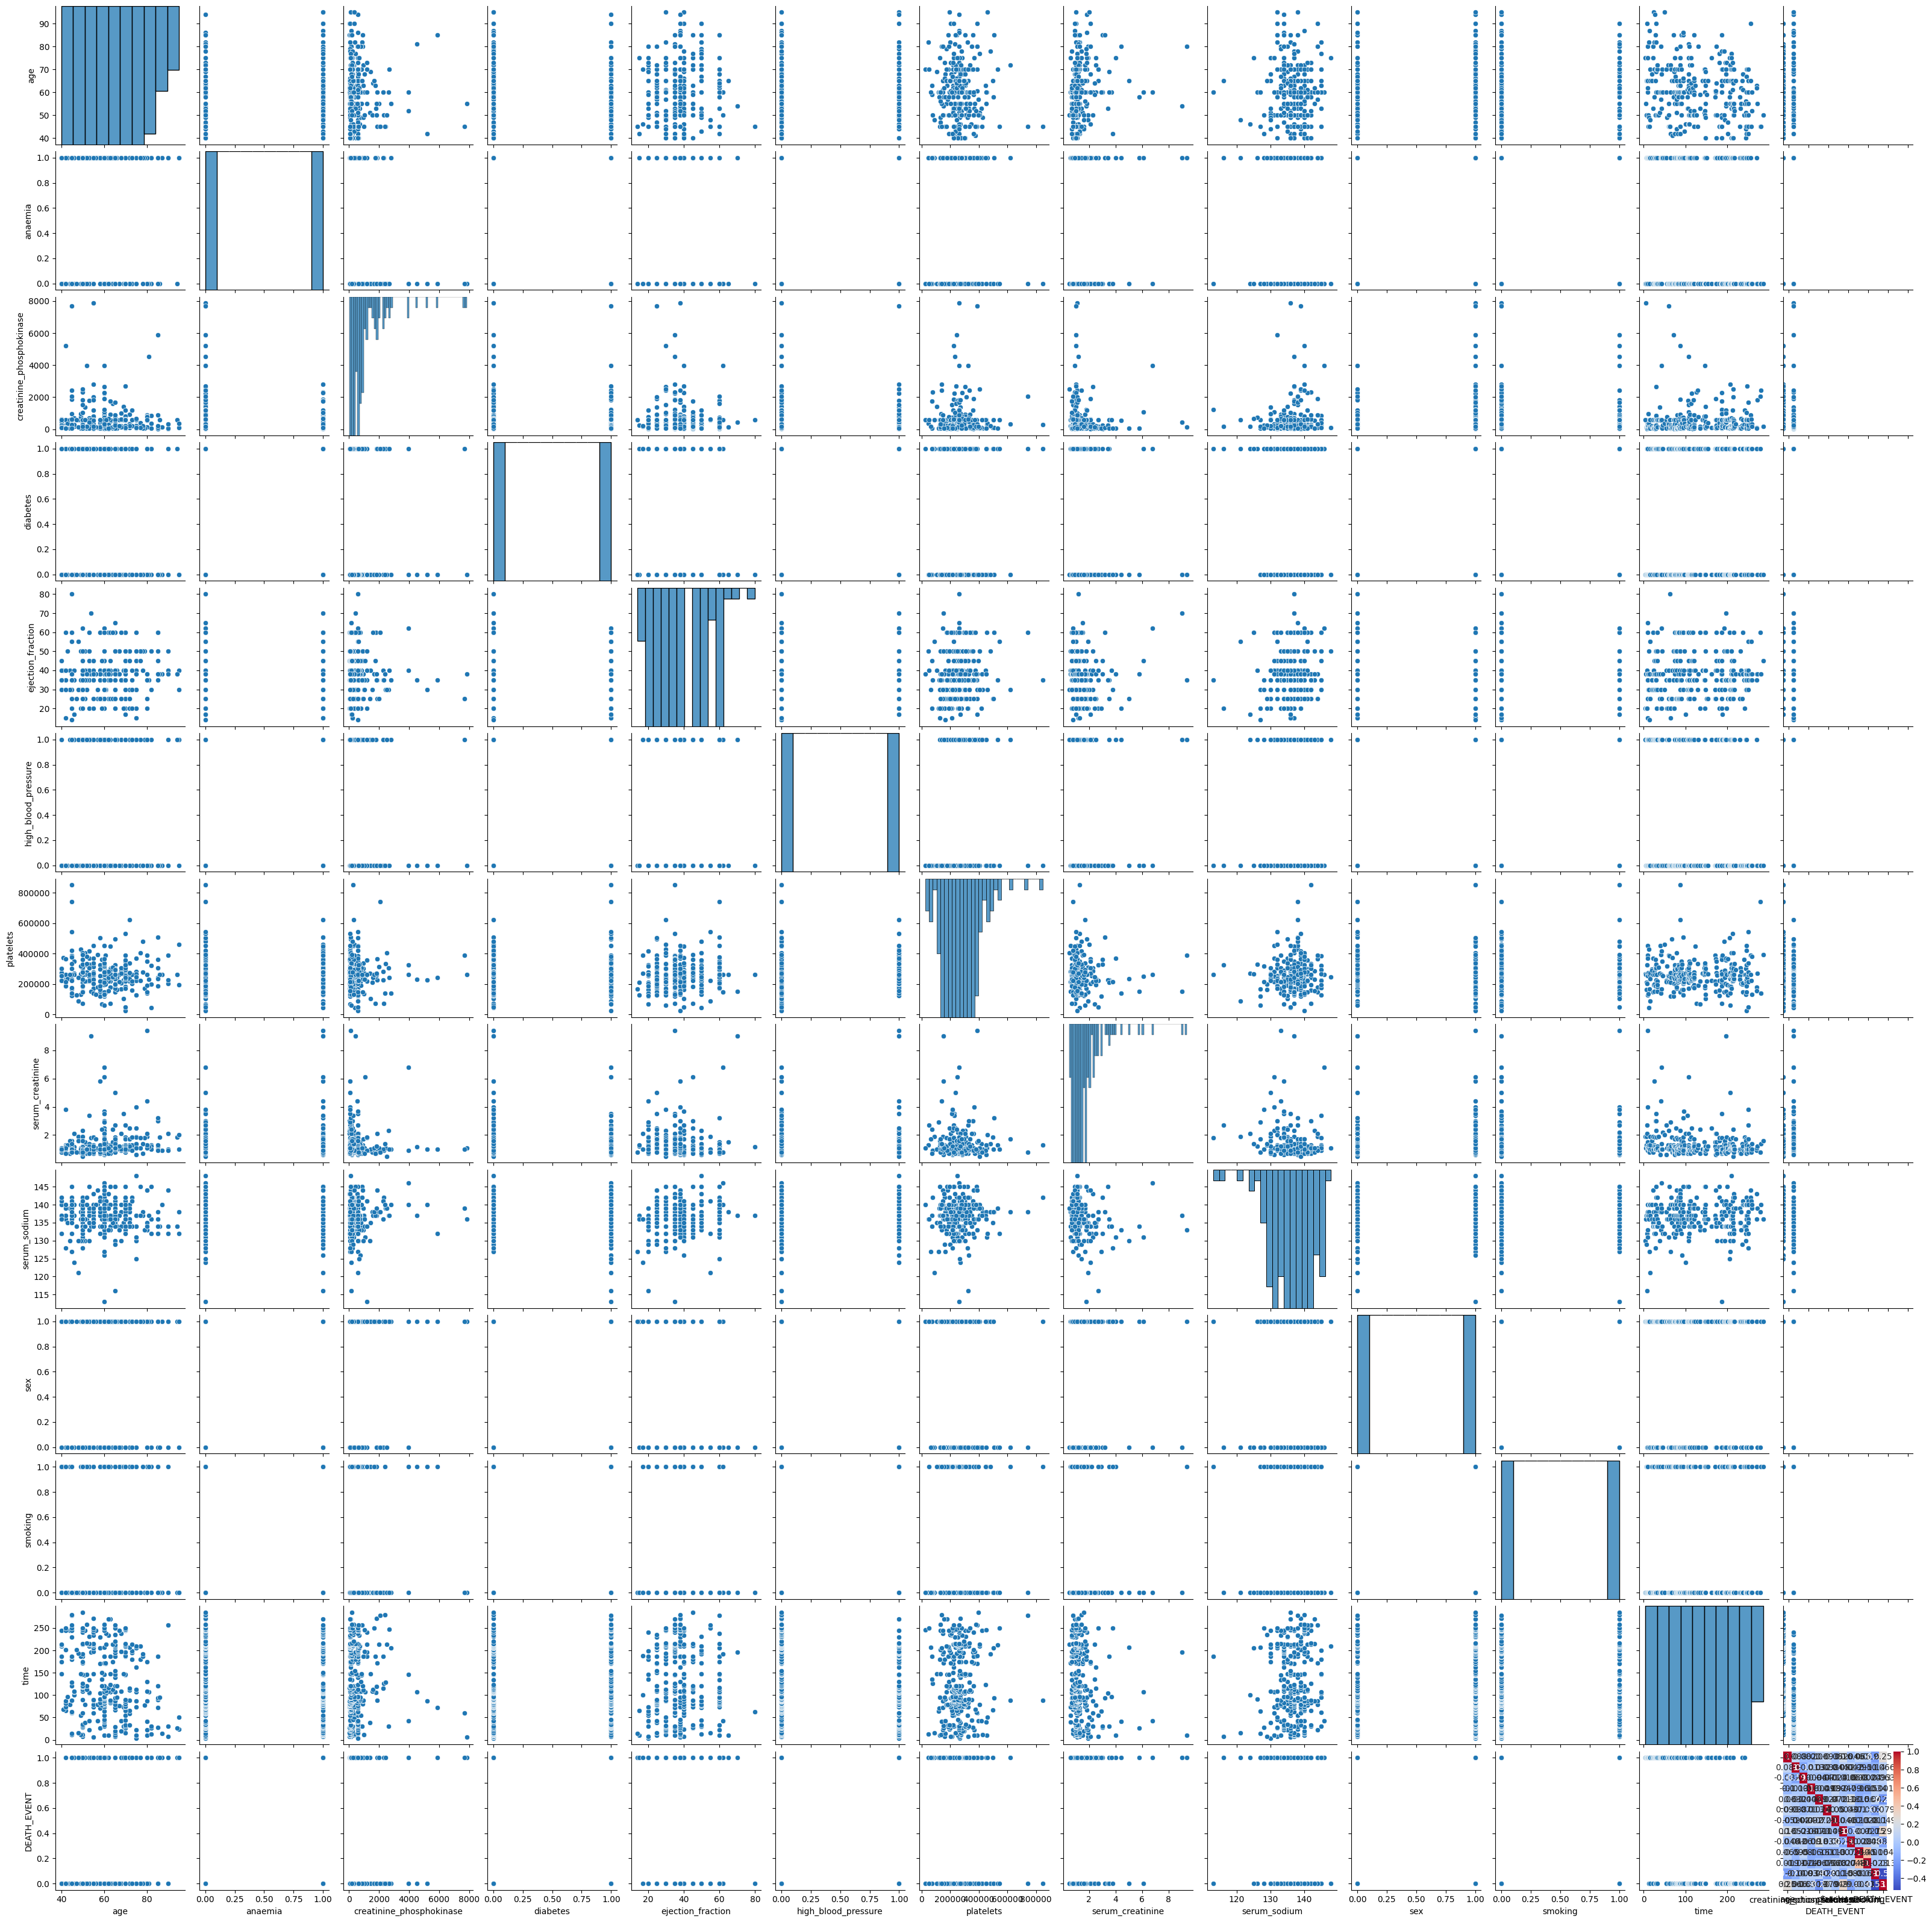

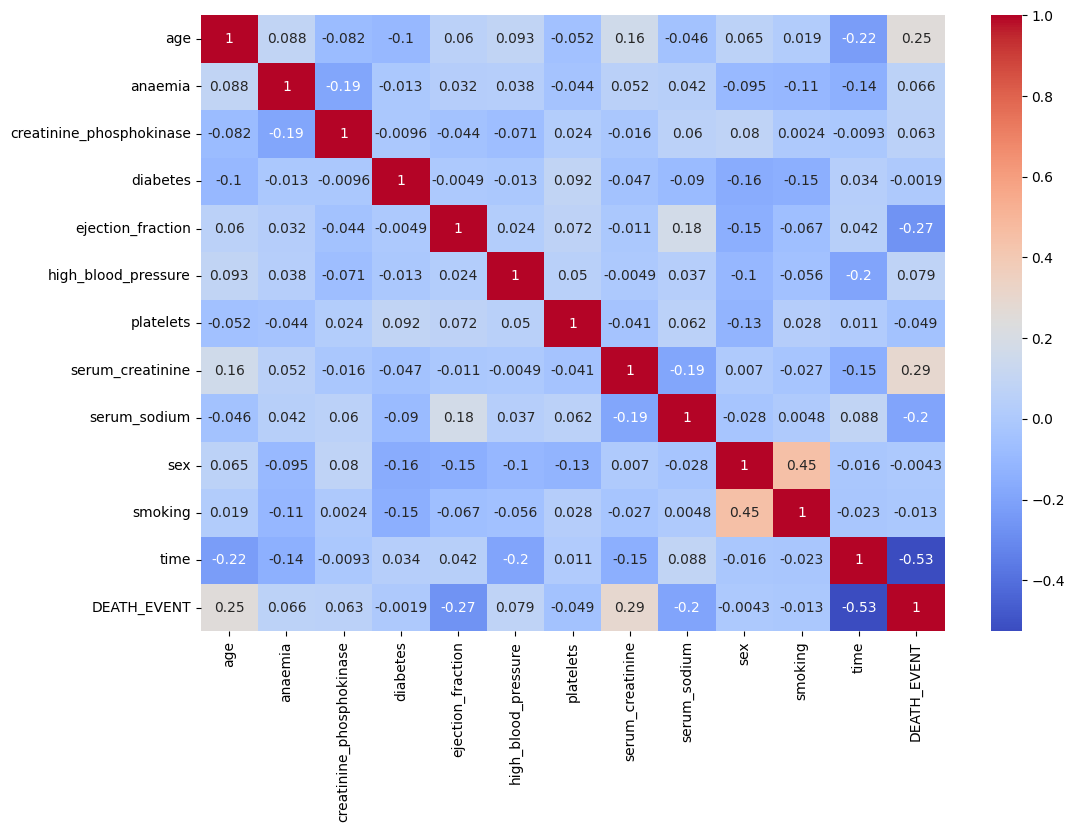

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Classroom/heart_failure_clinical_records_dataset.csv")


sns.pairplot(df)


corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


2)What is the distribution of ages in the dataset?

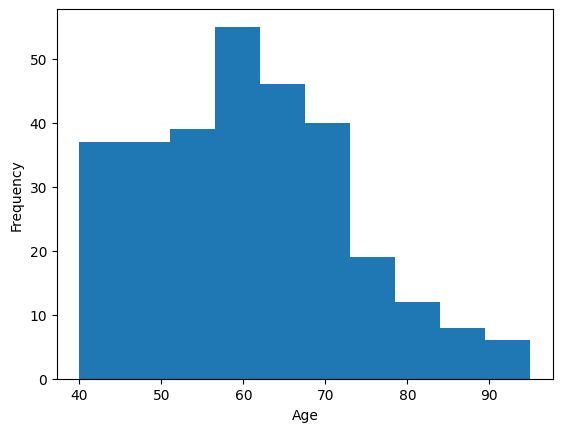

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("/content/drive/MyDrive/Classroom/heart_failure_clinical_records_dataset.csv")


plt.hist(df["age"], bins=10)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


2)Is there a correlation between serum creatinine levels and ejection fraction?

Correlation between serum creatinine levels and ejection fraction: -0.011302474995417347


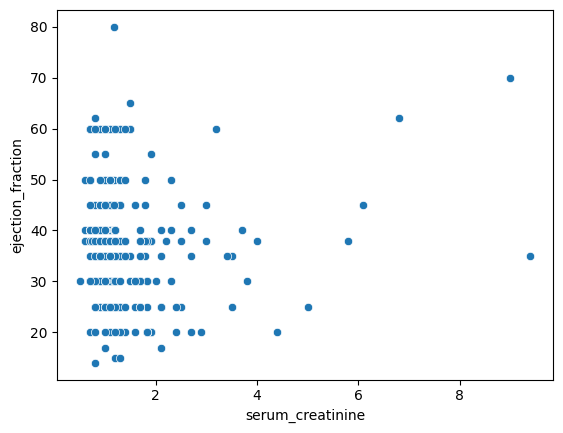

In [17]:
import pandas as pd
import seaborn as sns


df = pd.read_csv("/content/drive/MyDrive/Classroom/heart_failure_clinical_records_dataset.csv")


sns.scatterplot(data=df, x="serum_creatinine", y="ejection_fraction")

correlation = df["serum_creatinine"].corr(df["ejection_fraction"])
print("Correlation between serum creatinine levels and ejection fraction:", correlation)


3)What is the distribution of death events by gender?

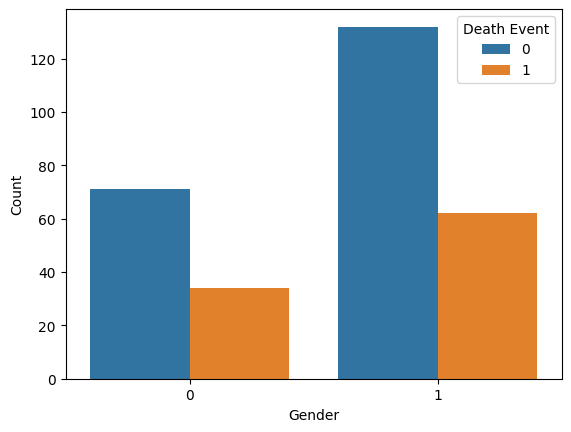

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("/content/drive/MyDrive/Classroom/heart_failure_clinical_records_dataset.csv")


sns.countplot(data=df, x="sex", hue="DEATH_EVENT")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Death Event", loc="upper right")
plt.show()


Missing values:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


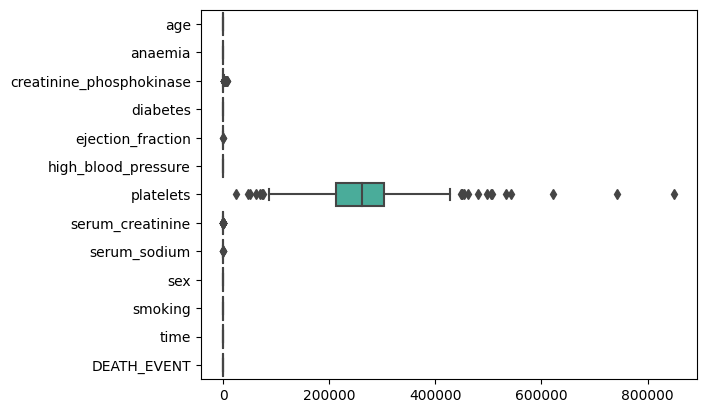

Data types:
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object
Duplicates:
0


In [14]:
import pandas as pd
import seaborn as sns


df = pd.read_csv("/content/drive/MyDrive/Classroom/heart_failure_clinical_records_dataset.csv")


print("Missing values:")
print(df.isnull().sum())


sns.boxplot(data=df, orient="h")
plt.show()


print("Data types:")
print(df.dtypes)


print("Duplicates:")
print(df.duplicated().sum())


 Given the patient's clinical features, the goal is to predict whether the patient will experience heart failure or not.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv("/content/drive/MyDrive/Classroom/heart_failure_clinical_records_dataset.csv")


X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_lr)
print("Confusion Matrix:", confusion_matrix_lr)


rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Results:")
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:", confusion_matrix_rf)


Logistic Regression Results:
Accuracy: 0.8
Confusion Matrix: [[33  2]
 [10 15]]
Random Forest Results:
Accuracy: 0.7166666666666667
Confusion Matrix: [[32  3]
 [14 11]]


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv("/content/drive/MyDrive/Classroom/heart_failure_clinical_records_dataset.csv")


X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("Support Vector Machine Results:")
print("Accuracy:", accuracy_svm)
print("Confusion Matrix:", confusion_matrix_svm)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("K-Nearest Neighbors Results:")
print("Accuracy:", accuracy_knn)
print("Confusion Matrix:", confusion_matrix_knn)


Support Vector Machine Results:
Accuracy: 0.5833333333333334
Confusion Matrix: [[35  0]
 [25  0]]
K-Nearest Neighbors Results:
Accuracy: 0.5333333333333333
Confusion Matrix: [[30  5]
 [23  2]]
